# Exploratory Data Analysis on High Ranked Dataset 

First step was to scrape potentially insightful data on the top 50 ranked players from each region in Episode 9 Act 3. I was able to collect 292/300 of those players (variability in the tracker.gg website). 

### I. Data Re-formatting

In [36]:
import pandas as pd
import numpy as np
from clean_label import standardize_column_names, time_to_seconds, clean_numeric_column

In [2]:
top_players = pd.read_csv("data/scraped_player_stats_3.csv")
top_players.head() # uncleaned data

,IGN,region,rank_rating,Combat_ability_1_casts,Combat_ability_1_casts/match,Combat_ability_1_casts/round,Combat_ability_2_casts,Combat_ability_2_casts/match,Combat_ability_2_casts/round,Combat_aces,...,Defense_round_win,Defense_rounds_lost,Defense_rounds_played,Defense_rounds_survived,Defense_rounds_traded,Defense_rounds_won,Defense_score,Uncategorized_peak_rating,Uncategorized_performance_score,Uncategorized_rating
0,SEN nightz#aim,na,"1,126","6,102",15.07,0.7,"11,629",28.71,1.4,24.0,...,58.3%,"1,784","4,280","1,413",706,"2,496","1,172,918","1,173",910.0,"1,126"
1,the chosen one#mØØda,na,"1,118","7,314",10.85,0.5,"13,763",20.42,1.0,51.0,...,55.5%,"3,125","7,017","1,909","1,124","3,892","1,838,132","1,118",813.0,"1,118"
2,humblegod#1122,na,"1,076","1,451",6.05,0.3,"9,092",37.88,1.8,8.0,...,57.5%,"1,049","2,469",850,474,"1,420","671,537","1,076",929.0,"1,076"
3,ENVY POPPIN#GUIDE,na,"1,066","2,061",10.41,0.5,"4,621",23.34,1.1,5.0,...,58.0%,875,"2,084",649,355,"1,209","543,547","1,111",887.0,"1,066"
4,KRÜ Shyy#Flow,na,"1,040","1,197",14.96,0.7,"2,340",29.25,1.4,8.0,...,61.9%,333,874,364,122,541,"268,898","1,184",981.0,"1,040"


In [3]:
# Standardize column headers
clean_players = standardize_column_names(top_players)

In [4]:
# Convert string time columns to float (seconds) (e.g. "01m 23s" -> 83)
clean_players["game_matches_duration"] = clean_players["game_matches_duration"].apply(time_to_seconds)
clean_players["game_rounds_duration"] = clean_players["game_rounds_duration"].apply(time_to_seconds)
clean_players["combat_time_played"] = clean_players["combat_time_played"].str.replace("h", "").astype(float)

In [5]:
# Convert incorrect string values (e.g. "1,234" -> 1234 or "58.3%" -> 0.583)
non_numeric_cols = ["ign", "region"]  
numeric_cols = [col for col in clean_players.columns if col not in non_numeric_cols]

for col in numeric_cols:
    clean_players[col] = clean_numeric_column(clean_players[col])

In [6]:
# Drop rows with missing values
print(f"Original number of rows: {len(clean_players.index)}")
clean_players = clean_players.dropna(axis=0)
print(f"Ending number of rows: {len(clean_players.index)}")

Original number of rows: 295
Ending number of rows: 292


In [7]:
# Cleaned data
clean_players.head()

,ign,region,rank_rating,combat_ability_1_casts,combat_ability_1_casts_per_match,combat_ability_1_casts_per_round,combat_ability_2_casts,combat_ability_2_casts_per_match,combat_ability_2_casts_per_round,combat_aces,...,defense_round_win,defense_rounds_lost,defense_rounds_played,defense_rounds_survived,defense_rounds_traded,defense_rounds_won,defense_score,uncategorized_peak_rating,uncategorized_performance_score,uncategorized_rating
0,SEN nightz#aim,na,1126,6102.0,15.07,0.7,11629.0,28.71,1.4,24.0,...,0.583,1784.0,4280.0,1413.0,706.0,2496.0,1172918.0,1173.0,910.0,1126.0
1,the chosen one#mØØda,na,1118,7314.0,10.85,0.5,13763.0,20.42,1.0,51.0,...,0.555,3125.0,7017.0,1909.0,1124.0,3892.0,1838132.0,1118.0,813.0,1118.0
2,humblegod#1122,na,1076,1451.0,6.05,0.3,9092.0,37.88,1.8,8.0,...,0.575,1049.0,2469.0,850.0,474.0,1420.0,671537.0,1076.0,929.0,1076.0
3,ENVY POPPIN#GUIDE,na,1066,2061.0,10.41,0.5,4621.0,23.34,1.1,5.0,...,0.580,875.0,2084.0,649.0,355.0,1209.0,543547.0,1111.0,887.0,1066.0
4,KRÜ Shyy#Flow,na,1040,1197.0,14.96,0.7,2340.0,29.25,1.4,8.0,...,0.619,333.0,874.0,364.0,122.0,541.0,268898.0,1184.0,981.0,1040.0


### II. Distribution Analysis Per Region

Key features to look at:
 1. RR
 2. ACS
 3. KAST
 4. Damage Delta?
 5. Damage per match
 6. ESR (entry success rate)
 7. First bloods per match
 8. Headshot percentage (headshot)
 9. KD ratio
 10. KDA ratio
 11. Kills per match
 12. Time played
 13. Round win rate
 14. Game win rate

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

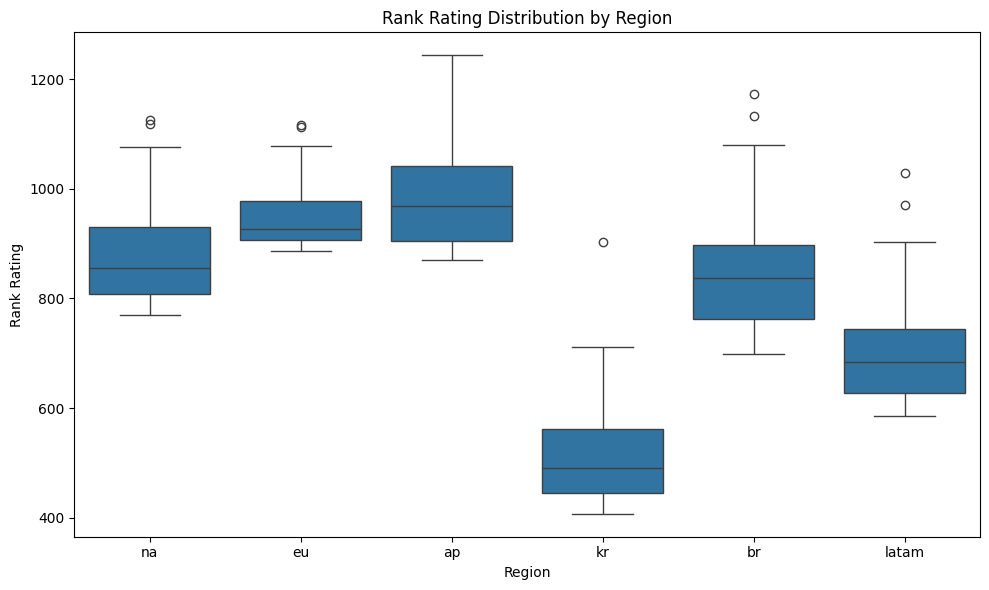

In [10]:
# Side by side box plots of RR distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_players, x="region", y="rank_rating")

plt.title("Rank Rating Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Rank Rating")
plt.tight_layout()
plt.show()


Note how Korea's distribution of RR is significantly lower than the rest. Wonder why that might be?  

<Axes: xlabel='region', ylabel='combat_acs'>

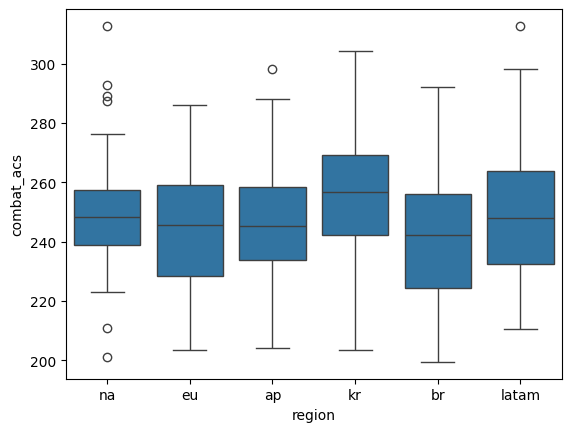

In [11]:
# acs by region?
sns.boxplot(data=clean_players, x="region", y="combat_acs")

<Axes: xlabel='region', ylabel='combat_kast'>

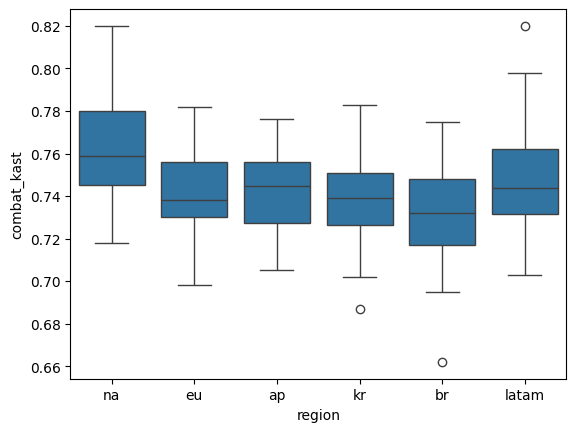

In [12]:
# kast by region?
sns.boxplot(data=clean_players, x="region", y="combat_kast")

Top NA players generally have a higher KAST than other regions. Interestingly, Brazil has an outlier with a significantly low KAST...

<Axes: xlabel='region', ylabel='combat_damage_delta_delta'>

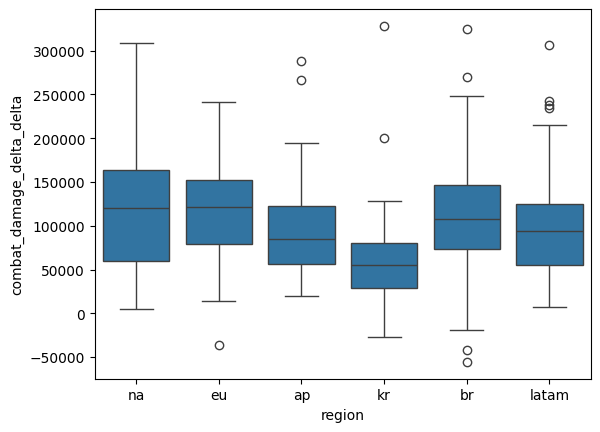

In [13]:
# damage delta vs region?
sns.boxplot(data=clean_players, x="region", y="combat_damage_delta_delta")

Korea again shows a distinct difference in terms of damage delta as they did with RR while having a relatively similar KAST. Might imply that Korean ranked games are more tactical/team focused rather than individual fragging heavy. Also, EU, Korea, Brazil, and maybe LATAM show some of their top 50 players having negative damage delta while the other regions primarily have players with positive damage deltas. These players win ranked games without crazy fragging, or do they just die a lot and still have impact? (Clove).  

<Axes: xlabel='region', ylabel='combat_damage_per_match'>

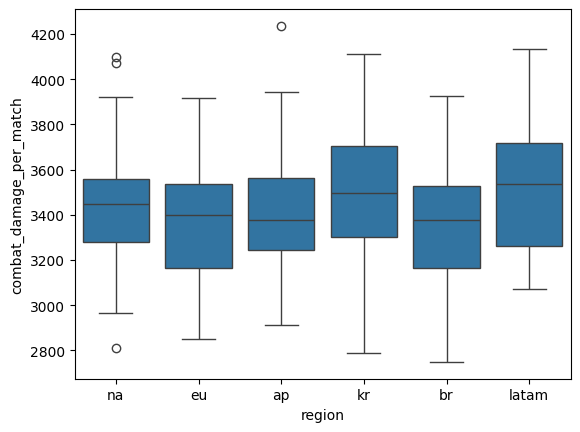

In [14]:
sns.boxplot(data=clean_players, x="region", y="combat_damage_per_match")

Going back to the last note, Korea and Brazil show particularly low damage/match stats among their top players. Are these the same people with low damage deltas?

<Axes: xlabel='region', ylabel='combat_esr'>

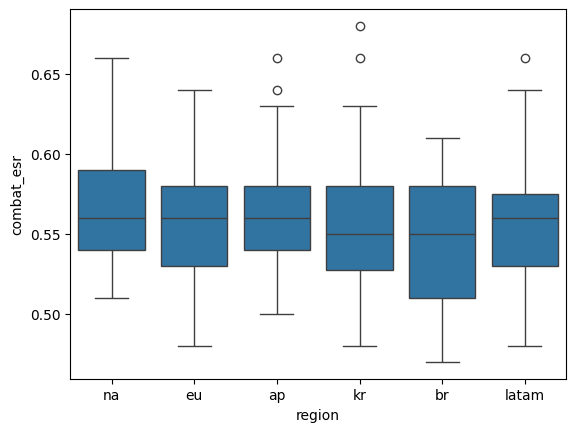

In [15]:
sns.boxplot(data=clean_players, x="region", y="combat_esr")

Entry success rate really just applies to duelists so looking at the distribution doesn't mean too much, but Korea has a couple demons. 

<Axes: xlabel='region', ylabel='combat_first_bloods_per_match'>

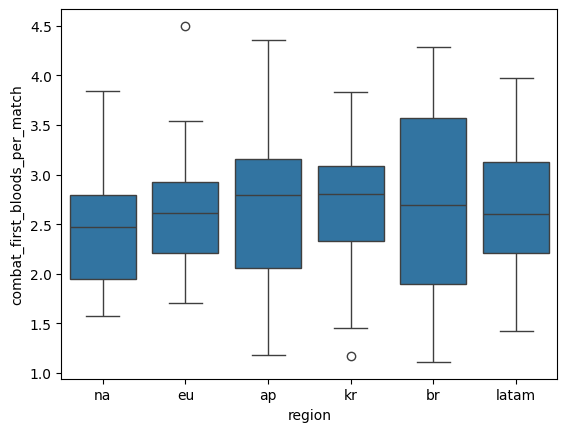

In [16]:
sns.boxplot(data=clean_players, x="region", y="combat_first_bloods_per_match")

<Axes: xlabel='region', ylabel='combat_headshot'>

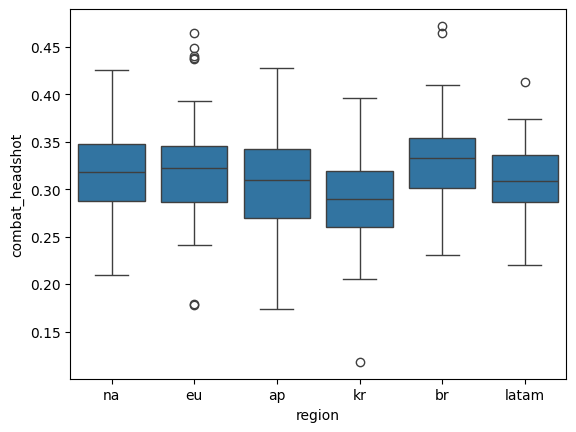

In [17]:
sns.boxplot(data=clean_players, x="region", y="combat_headshot")

Who tf in Korea has a <0.15 HS% that is in top 50? Wonder how that relates to win %. 

<Axes: xlabel='region', ylabel='combat_k_per_d_ratio'>

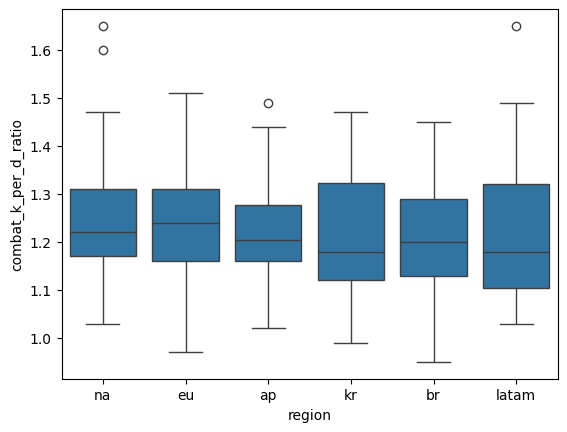

In [18]:
sns.boxplot(data=clean_players, x="region", y="combat_k_per_d_ratio")

<Axes: xlabel='region', ylabel='combat_k_per_d_ratio'>

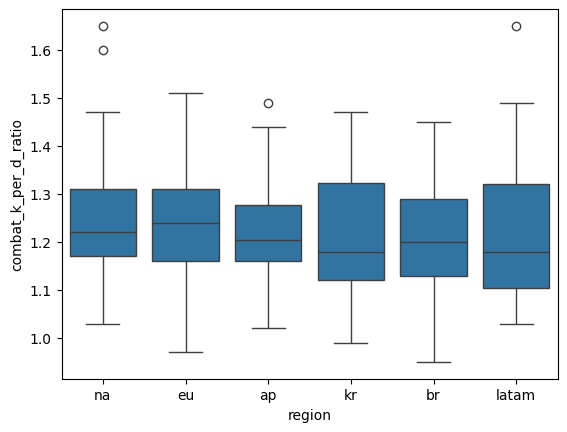

In [19]:
sns.boxplot(data=clean_players, x="region", y="combat_k_per_d_ratio")

<Axes: xlabel='region', ylabel='combat_kda_ratio'>

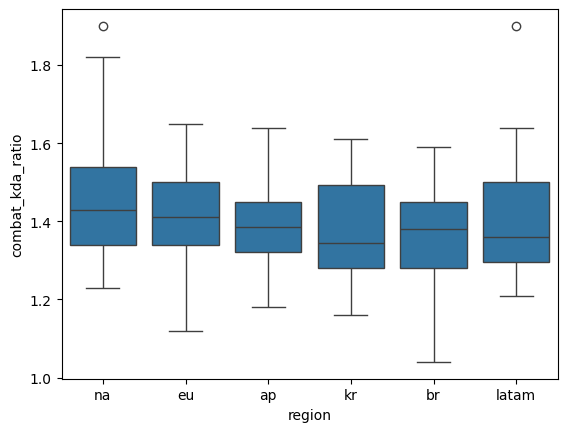

In [20]:
sns.boxplot(data=clean_players, x="region", y="combat_kda_ratio")

<Axes: xlabel='region', ylabel='combat_kills_per_match'>

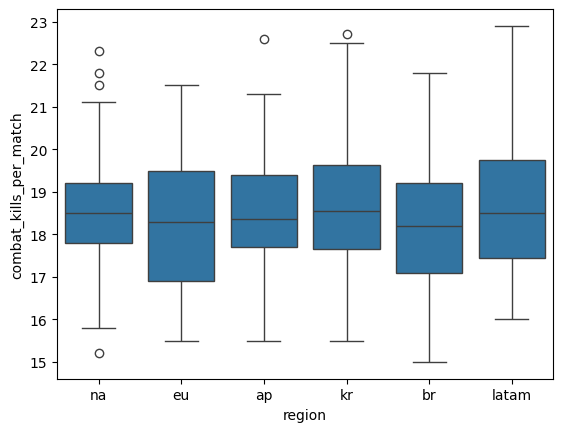

In [21]:
sns.boxplot(data=clean_players, x="region", y="combat_kills_per_match")

<Axes: xlabel='region', ylabel='combat_time_played'>

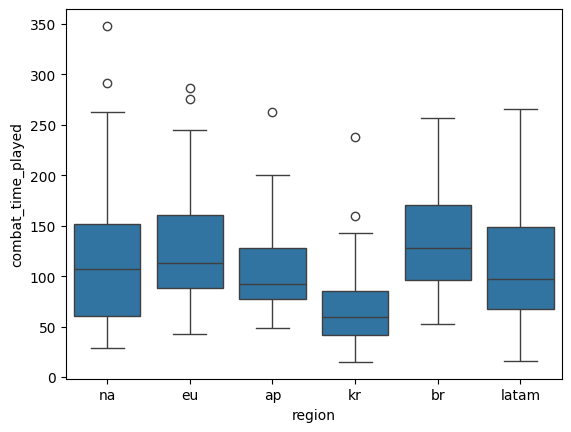

In [22]:
sns.boxplot(data=clean_players, x="region", y="combat_time_played")

Koreans just don't play as much as the rest of the world. 

<Axes: xlabel='region', ylabel='game_round_win'>

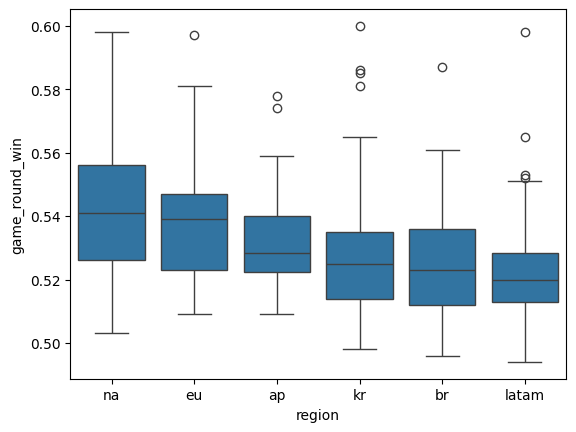

In [23]:
sns.boxplot(data=clean_players, x="region", y="game_round_win")

<Axes: xlabel='region', ylabel='game_win'>

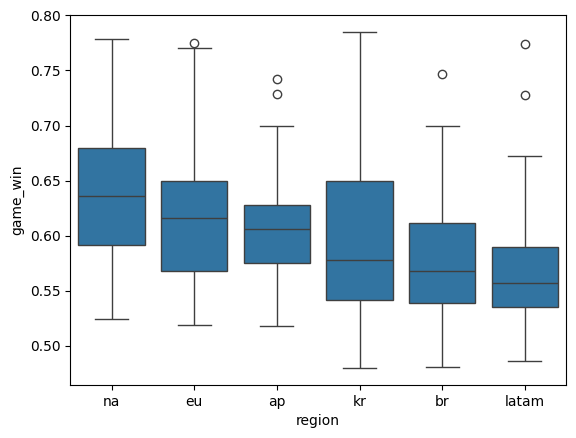

In [24]:
sns.boxplot(data=clean_players, x="region", y="game_win")

In [25]:
clean_players.columns.to_list()

['ign',
 'region',
 'rank_rating',
 'combat_ability_1_casts',
 'combat_ability_1_casts_per_match',
 'combat_ability_1_casts_per_round',
 'combat_ability_2_casts',
 'combat_ability_2_casts_per_match',
 'combat_ability_2_casts_per_round',
 'combat_aces',
 'combat_acs',
 'combat_assists',
 'combat_assists_per_match',
 'combat_assists_per_round',
 'combat_clutch',
 'combat_clutches',
 'combat_clutches_1v1',
 'combat_clutches_1v2',
 'combat_clutches_1v3',
 'combat_clutches_1v4',
 'combat_clutches_lost_1v2',
 'combat_clutches_lost_1v3',
 'combat_clutches_lost_1v4',
 'combat_clutches_lost_1v5',
 'combat_damage',
 'combat_damage_delta_delta',
 'combat_damage_received',
 'combat_damage_per_match',
 'combat_damage_per_minute',
 'combat_damage_per_round',
 'combat_dddelta_per_round',
 'combat_dealt_bodyshots',
 'combat_dealt_headshots',
 'combat_dealt_legshots',
 'combat_deaths',
 'combat_deaths_per_match',
 'combat_deaths_per_round',
 'combat_defuses',
 'combat_disconnects',
 'combat_econ_rating

### III. Correlation Analysis and Filtering Low-Variance and High-Correlation Data

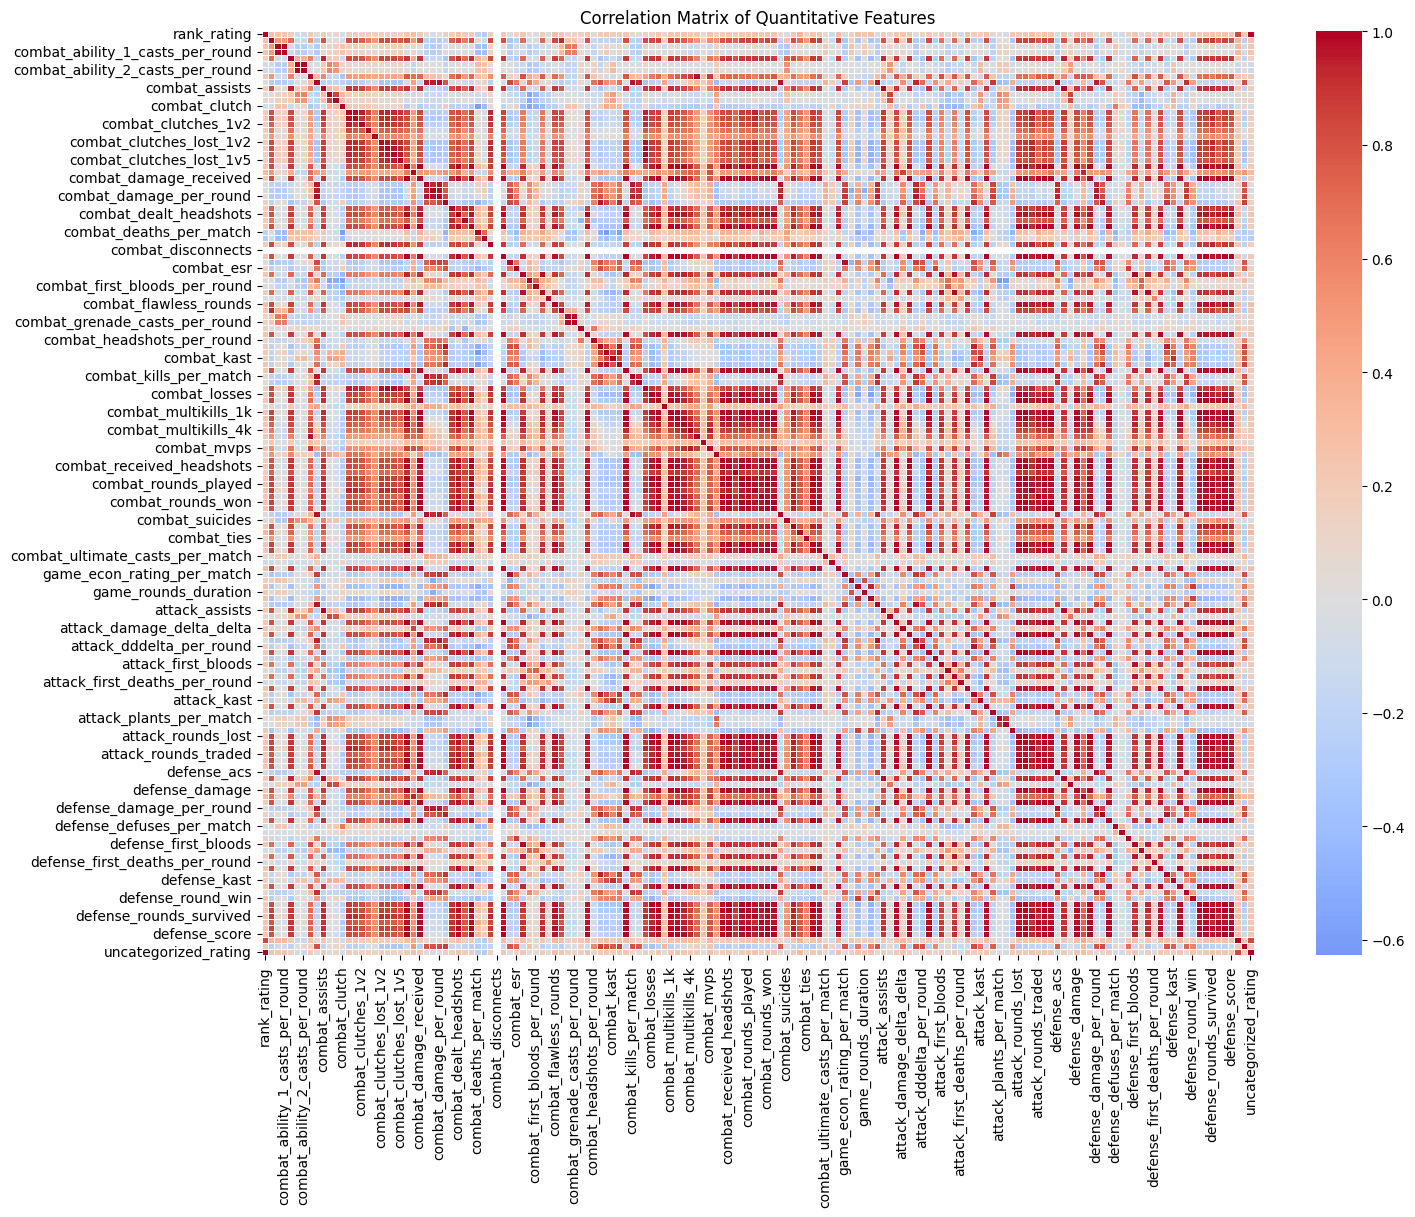

In [26]:
corr_matrix = clean_players.corr(numeric_only=True)

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Matrix of Quantitative Features")
plt.show()

This is hard to look at! Let's break down the correlation matrix into a dataframe containing pairwise correlations in descending order. 

In [27]:
# Unstack the correlation matrix and reset as a Series
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ["Feature 1", "Feature 2", "Correlation"]

# Drop self-correlations
corr_pairs = corr_pairs[corr_pairs["Feature 1"] != corr_pairs["Feature 2"]]

# Drop duplicate pairs (A,B) and (B,A)
corr_pairs["pair"] = corr_pairs.apply(lambda row: tuple(sorted([row["Feature 1"], row["Feature 2"]])), axis=1)
corr_pairs = corr_pairs.drop_duplicates(subset="pair").drop(columns="pair")

# Sort by correlation strength
sorted_corr_pairs = corr_pairs.sort_values(by="Correlation", ascending=False)

sorted_corr_pairs.head()

,Feature 1,Feature 2,Correlation
153,rank_rating,uncategorized_rating,1.000000
11668,combat_rounds_played,attack_rounds_played,0.999706
11696,combat_rounds_played,defense_rounds_played,0.999706
8703,combat_kills,combat_score,0.999627
22018,defense_kills,defense_score,0.999573


We have a lot of HIGHLY correlated variables that we can remove without losing too much information (literally rank_rating and uncategorized_rating are the same). Before we move onto that, let's see which variable correlated with RR the most!

In [28]:
rr_corrs = corr_matrix["rank_rating"].drop("rank_rating").sort_values(ascending=False)

In [29]:
rr_corrs.head(11) # top positive

uncategorized_rating          1.000000
uncategorized_peak_rating     0.835845
combat_thrifty_rounds         0.342964
combat_wins                   0.307400
combat_damage_delta_delta     0.303996
defense_damage_delta_delta    0.297250
combat_flawless_rounds        0.288583
combat_ability_1_casts        0.273133
game_win                      0.269406
game_round_win                0.263265
attack_rounds_survived        0.263104
Name: rank_rating, dtype: float64

In [30]:
rr_corrs.tail(10) # top negative

attack_plants_per_round            -0.073728
combat_clutch                      -0.079631
defense_defuses_per_match          -0.086415
defense_defuses_per_round          -0.094260
combat_ability_2_casts_per_match   -0.098681
combat_ability_2_casts_per_round   -0.101492
combat_ultimate_casts_per_round    -0.111359
combat_deaths_per_match            -0.216655
combat_deaths_per_round            -0.280430
combat_disconnects                       NaN
Name: rank_rating, dtype: float64

Next, we will remove low-variance variables and highly correlated variables. 

Low variance means they don't change much from player to player, as in every player has approximately the same value for this stat.

Highly correlated variables are variables that are so related to each other, removing one doesn't hurt our analysis because the other can simply take its place (i.e. these variables don't add any value to our analysis).

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

# Separate categorical and quantitative columns
cat_cols = ["ign", "region"]
quan_players = clean_players.drop(columns=cat_cols)

# Standardize the quantitative data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(quan_players)
scaled_df = pd.DataFrame(scaled_data, columns=quan_players.columns)

In [34]:
# Find low-variance features
selector = VarianceThreshold(threshold=0.01)  # adjust threshold if needed
selector.fit(scaled_df)
low_variance_cols = scaled_df.columns[~selector.get_support()].tolist()

In [40]:
low_variance_cols

['combat_disconnects']

Disconnects are rare and don't mean anything w.r.t. ranked success! (duh)

In [46]:
# Identify highly correlated columns (correlation > 0.95)
corr_matrix = scaled_df.corr().abs()
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)
high_corr_cols = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]

# Want to keep at least one column from each highly correlated group
to_drop = set()
for col in upper_triangle.columns:
    upper_tri_features = upper_triangle.index[upper_triangle[col] > 0.95].tolist()
    if upper_tri_features:
        # Drop only the current column (col), keep the first in each group
        to_drop.add(col)

In [50]:
list(to_drop)

['combat_wins',
 'defense_damage_per_round',
 'defense_damage',
 'attack_first_deaths',
 'combat_last_deaths',
 'attack_rounds_lost',
 'combat_received_headshots',
 'defense_headshots',
 'combat_rounds_traded',
 'combat_clutches_1v2',
 'combat_rounds_lost',
 'attack_deaths_per_round',
 'combat_mvps',
 'combat_damage_received',
 'defense_score',
 'defense_damage_received',
 'combat_headshots',
 'combat_rounds_played',
 'combat_team_aces',
 'combat_time_played',
 'defense_rounds_won',
 'combat_ultimate_casts',
 'attack_rounds_traded',
 'defense_rounds_traded',
 'combat_multikills_3k',
 'combat_damage_per_minute',
 'combat_ability_1_casts_per_round',
 'combat_multikills_2k',
 'attack_assists',
 'combat_score_per_match',
 'combat_kda_ratio',
 'game_econ_rating_per_match',
 'attack_rounds_won',
 'attack_acs',
 'attack_headshots',
 'combat_rounds_survived',
 'defense_rounds_played',
 'attack_damage_per_round',
 'combat_kills',
 'attack_kills',
 'attack_rounds_played',
 'defense_rounds_lost',

In [49]:
# Drop low-variance columns from your standardized data
cols_to_drop = list(set(low_variance_cols).union(to_drop))
filtered_df = scaled_df.drop(columns=cols_to_drop)

In [51]:
filtered_df.head()

,rank_rating,combat_ability_1_casts,combat_ability_1_casts_per_match,combat_ability_2_casts,combat_ability_2_casts_per_match,combat_aces,combat_acs,combat_assists,combat_assists_per_match,combat_assists_per_round,...,defense_defuses_per_match,defense_defuses_per_round,defense_esr,defense_first_bloods_per_round,defense_first_deaths_per_round,defense_kast,defense_kills_per_round,defense_round_win,uncategorized_peak_rating,uncategorized_performance_score
0,1.683617,2.299408,0.805977,1.964632,0.501655,2.319682,0.717425,1.646807,-0.057619,0.832600,...,0.143496,-0.131991,0.556767,-0.689019,0.137839,0.886629,1.136691,1.091039,1.030312,0.827271
1,1.640001,3.080026,-0.352048,2.629759,-0.844164,6.437757,0.348166,2.464855,-1.373527,-0.941993,...,-1.002729,-0.131991,-0.115035,1.451338,0.137839,-1.017652,-0.032019,-0.081301,0.781820,-0.073391
2,1.411021,-0.696180,-1.669234,1.173896,1.990335,-0.120659,0.799482,0.652664,0.882315,0.832600,...,-0.748012,-0.131991,1.004635,-0.689019,0.137839,1.492536,1.136691,0.756085,0.592063,1.003689
3,1.356501,-0.303295,-0.472790,-0.219631,-0.370124,-0.578223,-0.098591,0.489374,1.728255,0.832600,...,-0.111220,-0.131991,-0.786837,-0.689019,0.137839,0.670233,-0.032019,0.965431,0.750194,0.613712
4,1.214751,-0.859775,0.775792,-0.930576,0.589320,-0.120659,2.044020,-0.994637,0.694328,0.832600,...,0.143496,-0.131991,1.900372,-0.689019,0.137839,2.964025,2.305402,2.598334,1.080010,1.486519


### IV. Feature Importance when Predicting RR

Here, I will train models to predict RR using the processed data from before. I'm not necessarily looking to build a high-performing rank predictor, rather, looking to extract insights from these models to see which variables they deduce are important for rank improvement. The models to be trained are:
1. Lasso (L1) Regression
2. Ridge (L2) Regression
3. Random Forest
4. XGBoost

*Note for my Random Forest and XGBoost models, I will be using GridSearchCV to do some light hyperparameter optimization to make sure I get the best models. Even though I'm not looking for high-performance, the better they perform the more valuable the insights they can provide with their feature importances.

##### RR as Target Variable

In [115]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np
import pandas as pd

# 1. Define X and y
X = filtered_df.drop(["rank_rating", "uncategorized_peak_rating", "game_win", "game_round_win", "defense_round_win", "attack_round_win", "uncategorized_performance_score"], axis=1)
y = filtered_df["rank_rating"]

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420) #blazeit


In [116]:
# Lasso (L1)
lasso = LassoCV(cv=5, random_state=420)
lasso.fit(X_train, y_train)

lasso_importance = pd.Series(lasso.coef_, index=X.columns).sort_values(key=abs, ascending=False)

c:\Users\Polar\miniconda3\envs\valorant\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1271028615081562, tolerance: 0.01892172345973559
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Polar\miniconda3\envs\valorant\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5462368822166681, tolerance: 0.01892172345973559
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Polar\miniconda3\envs\valorant\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9088288194320739, tolerance: 0.01892172345973559
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Polar\miniconda3\envs\valorant\

In [117]:
# Ridge (L2)
ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)

ridge_importance = pd.Series(ridge.coef_, index=X.columns).sort_values(key=abs, ascending=False)

In [118]:
# Random Forest
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, n_jobs=-1)
rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_
rf_importance = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

In [119]:
# XGB
xgb_params = {
    "n_estimators": [100, 200],
    "max_depth": [3, 6],
    "learning_rate": [0.05, 0.1]
}

xgb_grid = GridSearchCV(XGBRegressor(random_state=42, verbosity=0), xgb_params, cv=3, n_jobs=-1)
xgb_grid.fit(X_train, y_train)

best_xgb = xgb_grid.best_estimator_
xgb_importance = pd.Series(best_xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

In [120]:
# Test models
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(model, X_test, y_test, name="Model"):
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)

    print(f"📊 {name} Test Performance:")
    print(f"  R²:   {r2:.4f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE:  {mae:.2f}")
    print("-" * 40)

evaluate_model(lasso, X_test, y_test, "LASSO")
evaluate_model(ridge, X_test, y_test, "Ridge")
evaluate_model(best_rf, X_test, y_test, "Random Forest")
evaluate_model(best_xgb, X_test, y_test, "XGBoost")

📊 LASSO Test Performance:
  R²:   0.4331
  RMSE: 0.79
  MAE:  0.64
----------------------------------------
📊 Ridge Test Performance:
  R²:   0.4733
  RMSE: 0.76
  MAE:  0.63
----------------------------------------
📊 Random Forest Test Performance:
  R²:   0.2699
  RMSE: 0.90
  MAE:  0.68
----------------------------------------
📊 XGBoost Test Performance:
  R²:   0.3092
  RMSE: 0.87
  MAE:  0.68
----------------------------------------


Our best model (Ridge Regression) seem to predict about 47% of the variability in rank rating among players in our dataset.

We will use the SHapley Additive exPlanations (SHAP) framework to better understand feature importances. This is superior to simply looking at the feature importances/coefficients from each model because it accounts for non-linear interactions between the variables. 

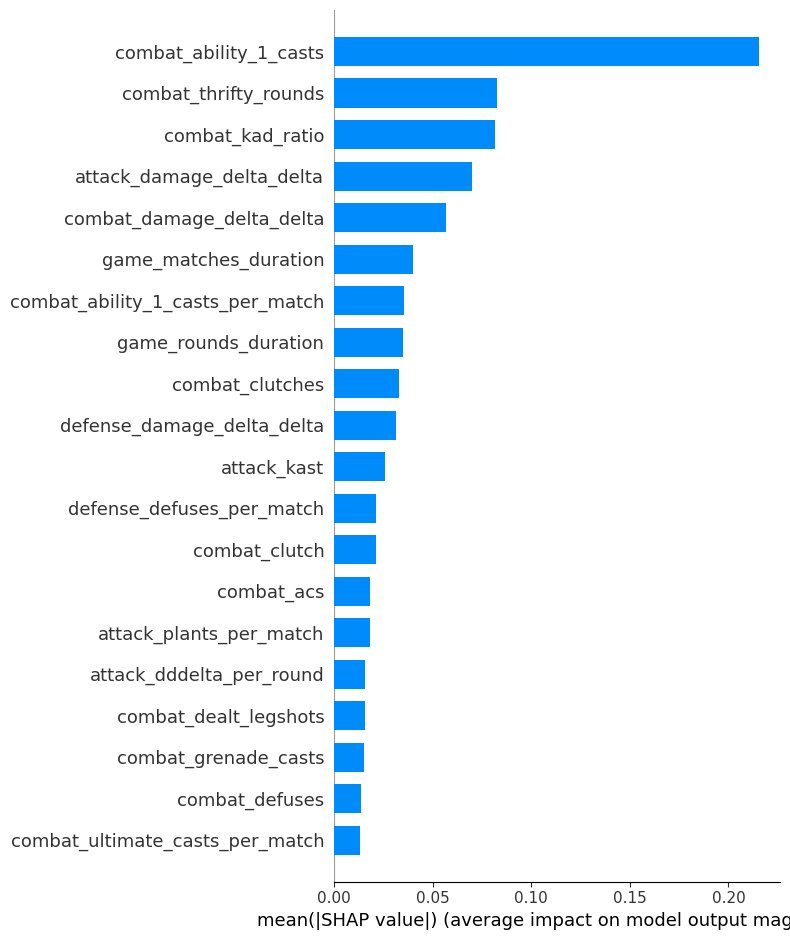

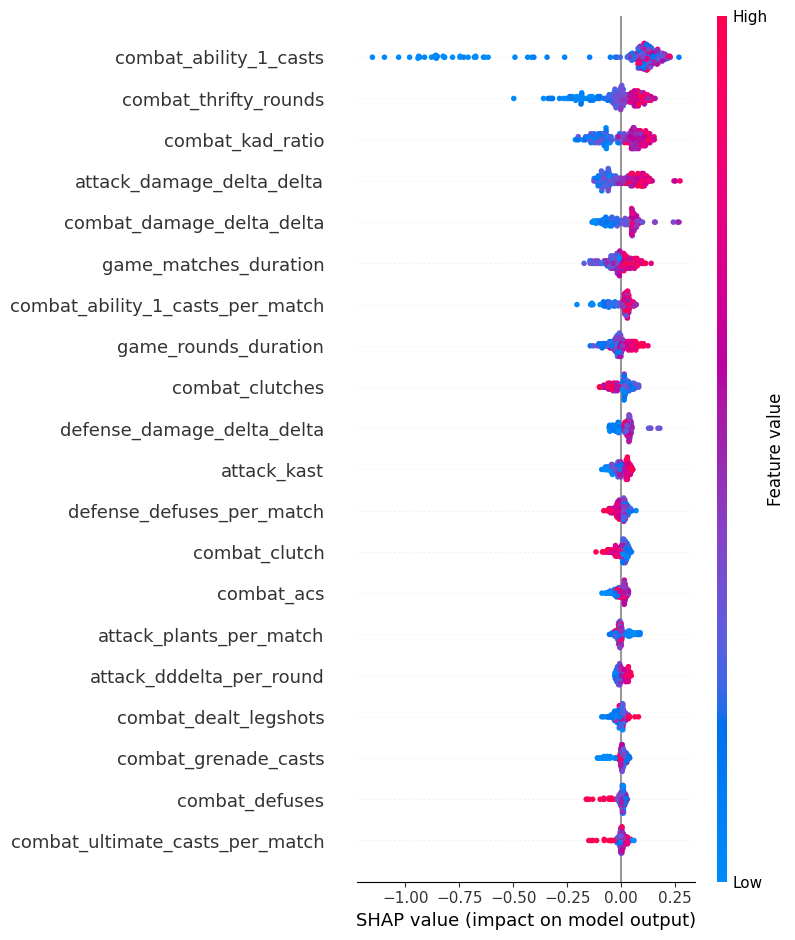

In [121]:
import shap

# Random Forest SHAP
rf_explainer = shap.TreeExplainer(best_rf)
rf_shap_values = rf_explainer.shap_values(X_train)

shap.summary_plot(rf_shap_values, X_train, max_display=20, plot_type="bar", show=True)
shap.summary_plot(rf_shap_values, X_train, max_display=20, show=True)

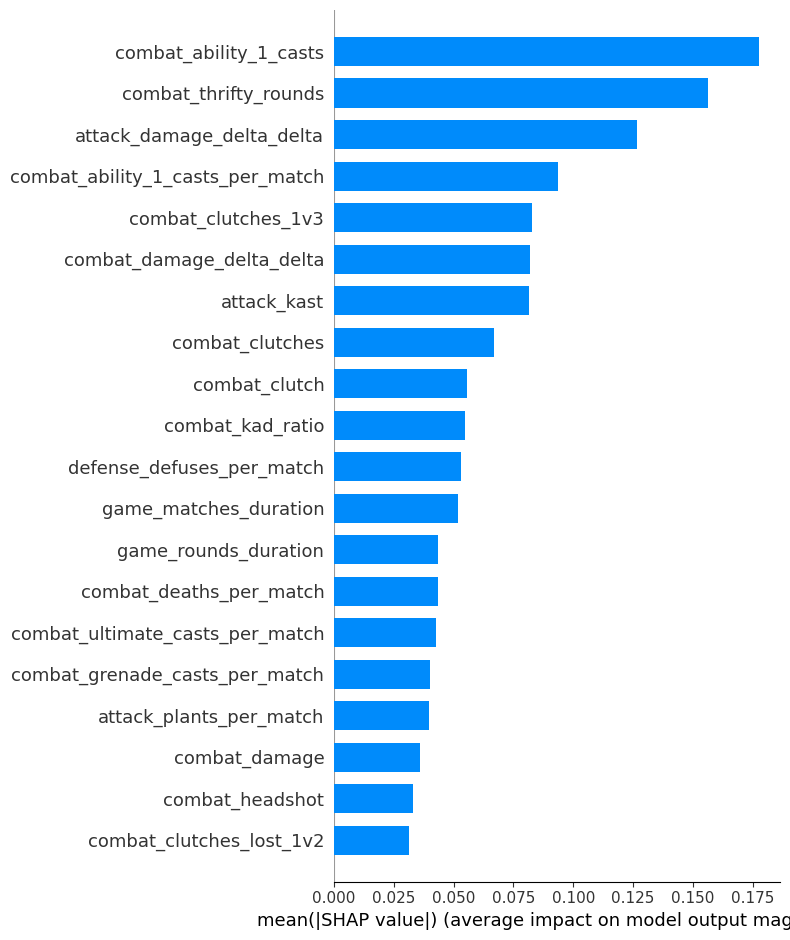

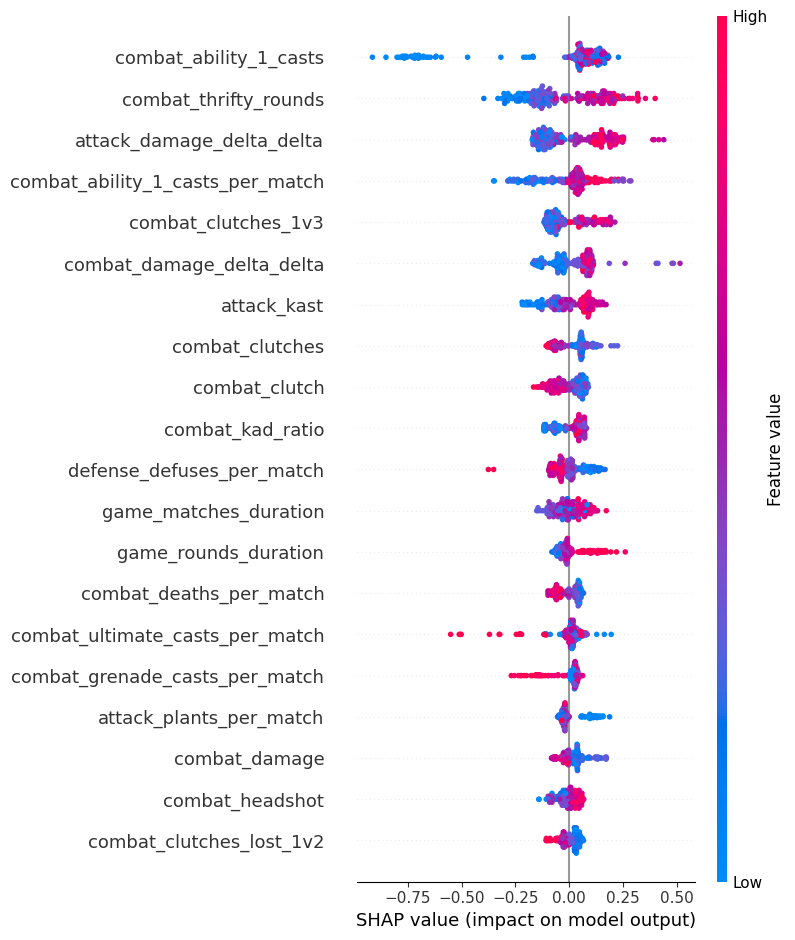

In [122]:
# XGBoost SHAP
xgb_explainer = shap.TreeExplainer(best_xgb)
xgb_shap_values = xgb_explainer.shap_values(X_train)

shap.summary_plot(xgb_shap_values, X_train, max_display=20, plot_type="bar", show=True)
shap.summary_plot(xgb_shap_values, X_train, max_display=20, show=True)

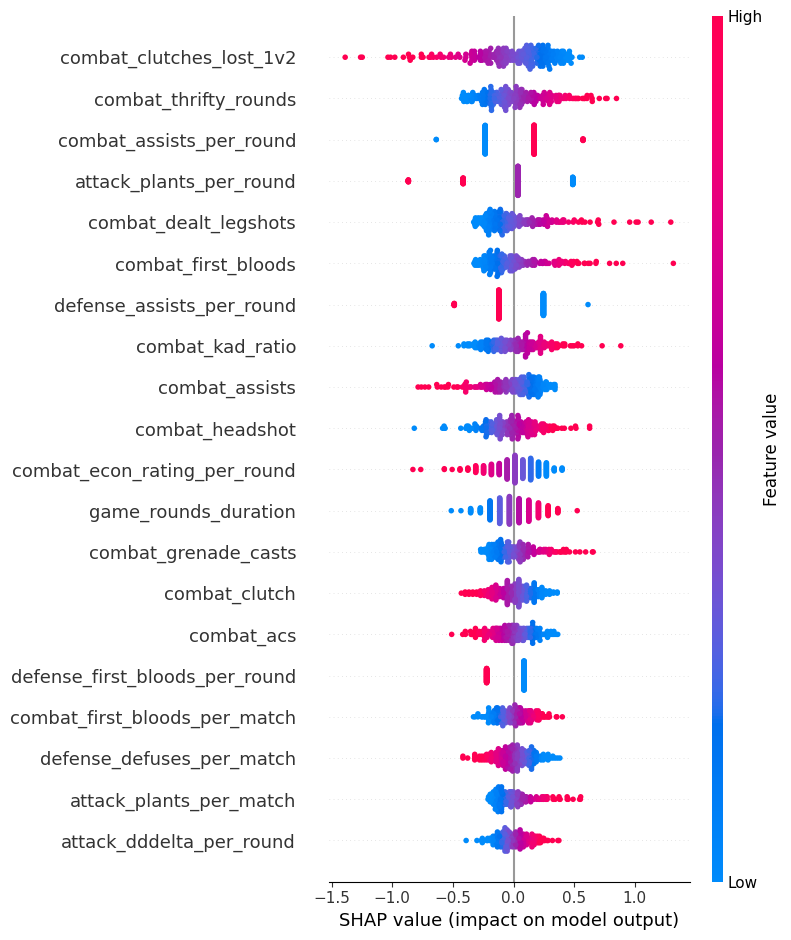

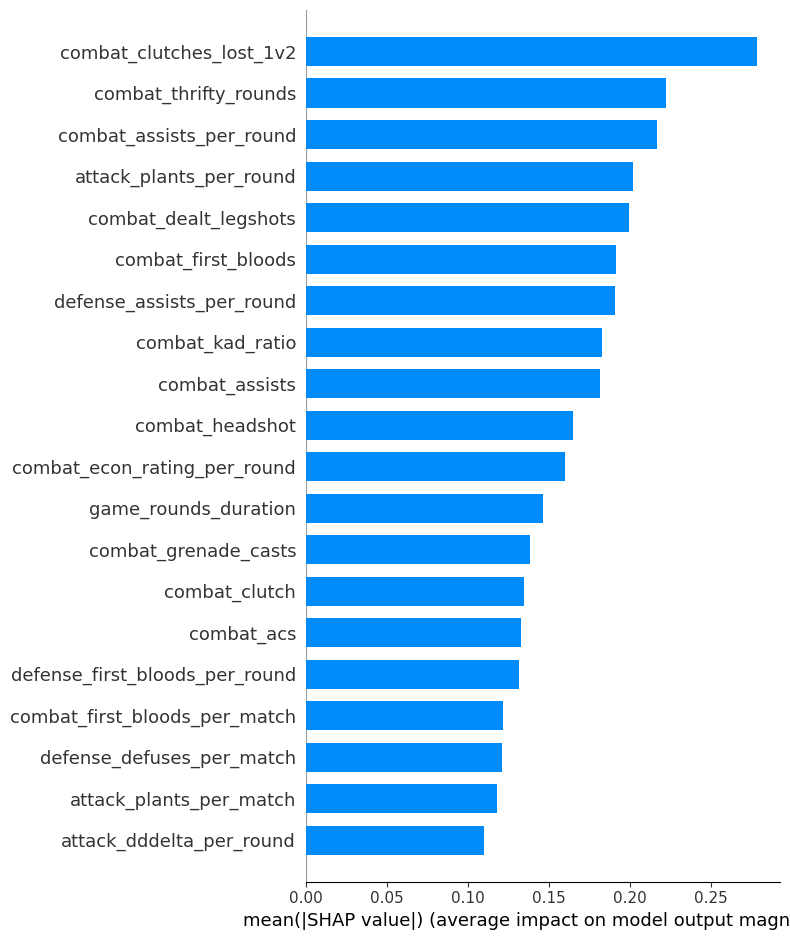

In [123]:
# Ridge
shap_linear = shap.Explainer(ridge, X_train)  
shap_values_linear = shap_linear(X_train)

shap.summary_plot(shap_values_linear, X_train, max_display=20)
shap.summary_plot(shap_values_linear, X_train, max_display=20, plot_type="bar", show=True)

Note that the graphs above represent the feature importances of the best performing model out of the four trained and tested (Ridge Regression). There are definitely some interesting variables/relationships here (like defense assists per round negatively affecting RR!).

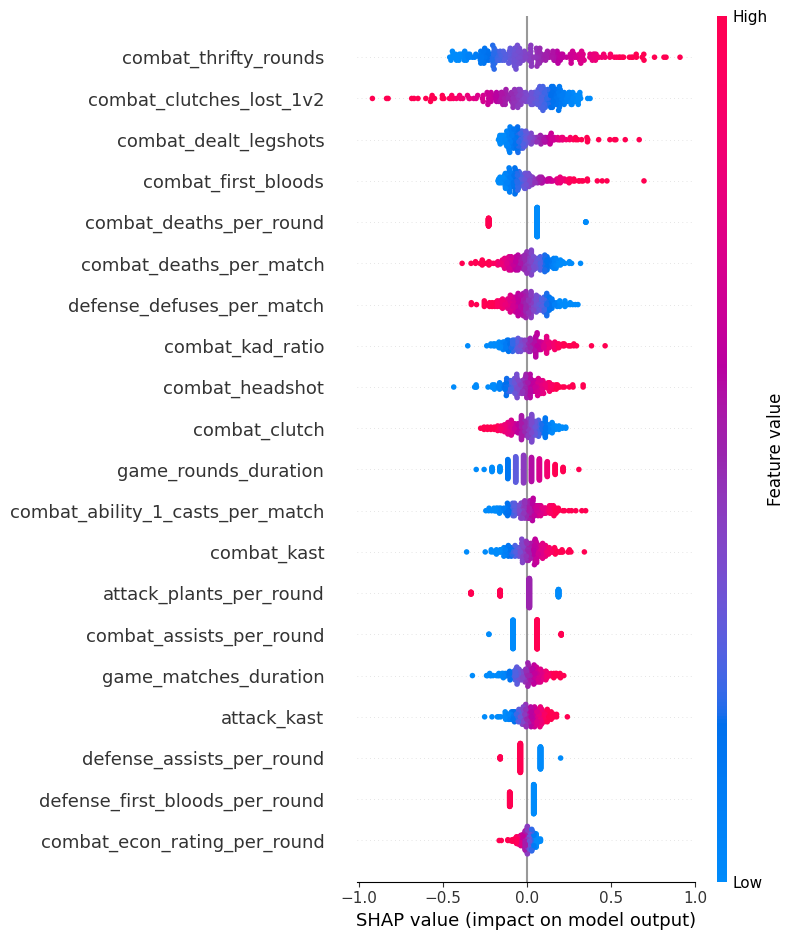

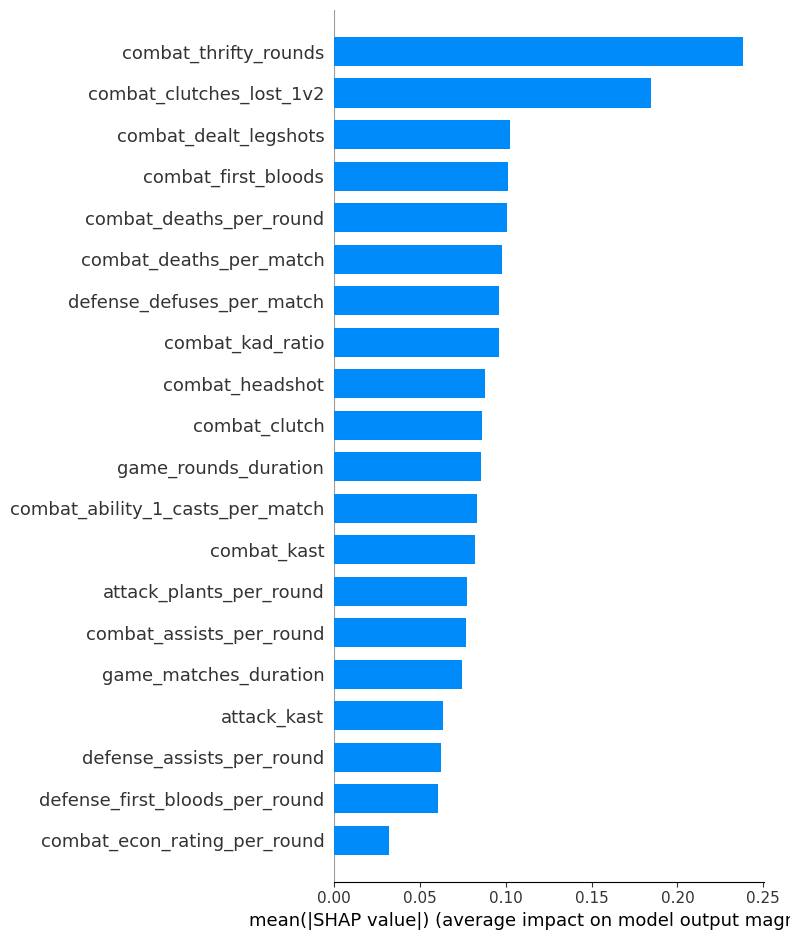

In [124]:
# Lasso
shap_linear = shap.Explainer(lasso, X_train)  
shap_values_linear = shap_linear(X_train)

shap.summary_plot(shap_values_linear, X_train, max_display=20)
shap.summary_plot(shap_values_linear, X_train, max_display=20, plot_type="bar", show=True)

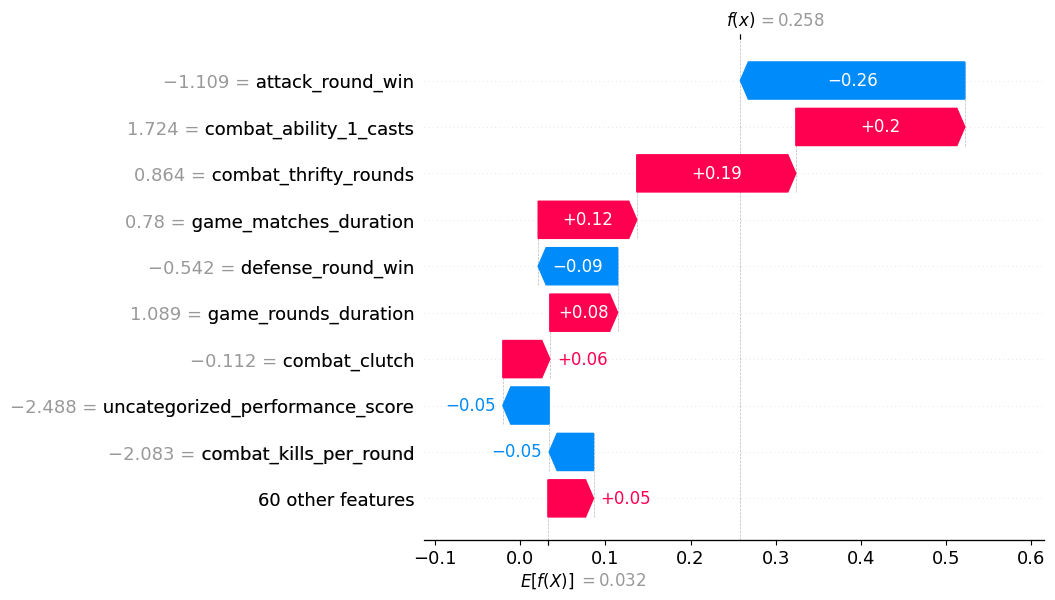

In [100]:
# Waterfall plot to observe a specific player! (play around with later)
xgb_explainer = shap.Explainer(best_xgb, X_train)  # or best_rf
xgb_shap_values = xgb_explainer(X_test)

shap.plots.waterfall(xgb_shap_values[0])

##### Game Win % as Target Variable

In [142]:
# 1. Define X and y
X = filtered_df.drop(["rank_rating", "uncategorized_peak_rating", "game_win", "game_round_win", "defense_round_win", "attack_round_win", "uncategorized_performance_score"], axis=1)
y = filtered_df["game_win"]

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420) #blazeit

In [143]:
# Lasso (L1)
lasso = LassoCV(cv=5, random_state=420)
lasso.fit(X_train, y_train)
lasso_importance = pd.Series(lasso.coef_, index=X.columns).sort_values(key=abs, ascending=False)

# Ridge (L2)
ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)
ridge_importance = pd.Series(ridge.coef_, index=X.columns).sort_values(key=abs, ascending=False)

# Random Forest
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_importance = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# XGB
xgb_params = {
    "n_estimators": [100, 200],
    "max_depth": [3, 6],
    "learning_rate": [0.05, 0.1]
}

xgb_grid = GridSearchCV(XGBRegressor(random_state=42, verbosity=0), xgb_params, cv=3, n_jobs=-1)
xgb_grid.fit(X_train, y_train)

best_xgb = xgb_grid.best_estimator_
xgb_importance = pd.Series(best_xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

c:\Users\Polar\miniconda3\envs\valorant\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09696095016195727, tolerance: 0.019828094521975616
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Polar\miniconda3\envs\valorant\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3416771218795418, tolerance: 0.019828094521975616
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Polar\miniconda3\envs\valorant\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5751579546946033, tolerance: 0.019828094521975616
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Polar\miniconda3\envs\valor

In [144]:
# Test models
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(model, X_test, y_test, name="Model"):
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)

    print(f"📊 {name} Test Performance:")
    print(f"  R²:   {r2:.4f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE:  {mae:.2f}")
    print("-" * 40)

evaluate_model(lasso, X_test, y_test, "LASSO")
evaluate_model(ridge, X_test, y_test, "Ridge")
evaluate_model(best_rf, X_test, y_test, "Random Forest")
evaluate_model(best_xgb, X_test, y_test, "XGBoost")

📊 LASSO Test Performance:
  R²:   0.5517
  RMSE: 0.61
  MAE:  0.50
----------------------------------------
📊 Ridge Test Performance:
  R²:   0.5821
  RMSE: 0.59
  MAE:  0.46
----------------------------------------
📊 Random Forest Test Performance:
  R²:   0.6020
  RMSE: 0.58
  MAE:  0.46
----------------------------------------
📊 XGBoost Test Performance:
  R²:   0.5870
  RMSE: 0.59
  MAE:  0.48
----------------------------------------


Using game win % as the target variable, our Random Forest model performed the best, probably giving the most insights. XGBoost is another tree-type model, so we'll focus on RF. Ridge however uses a completely different approach, hence we will look at those as well.

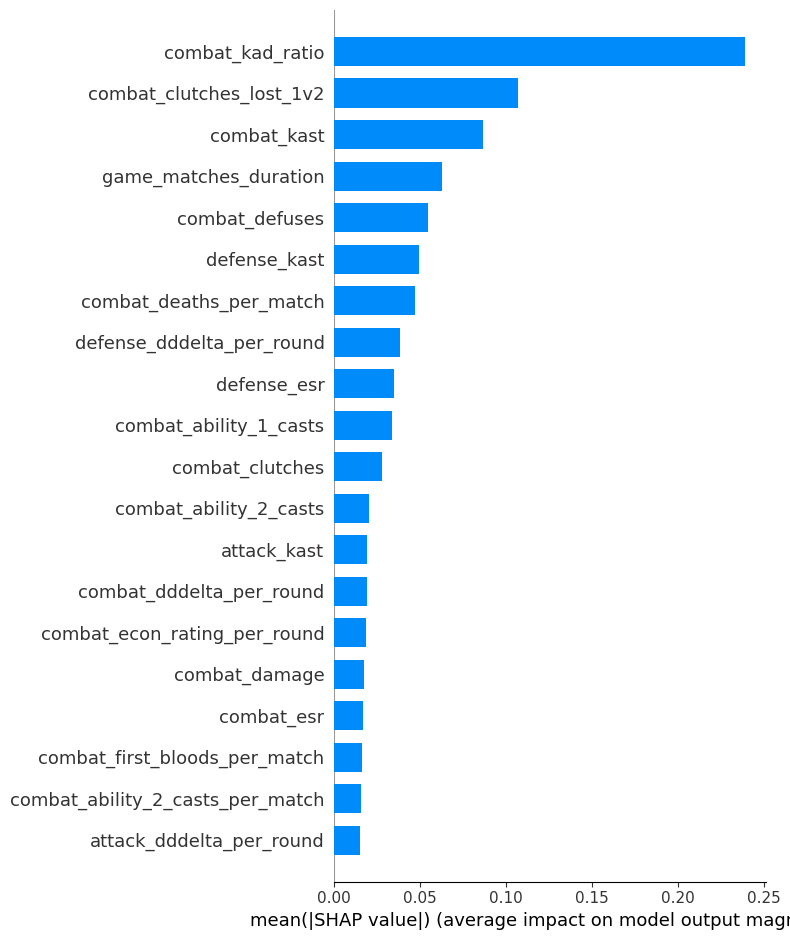

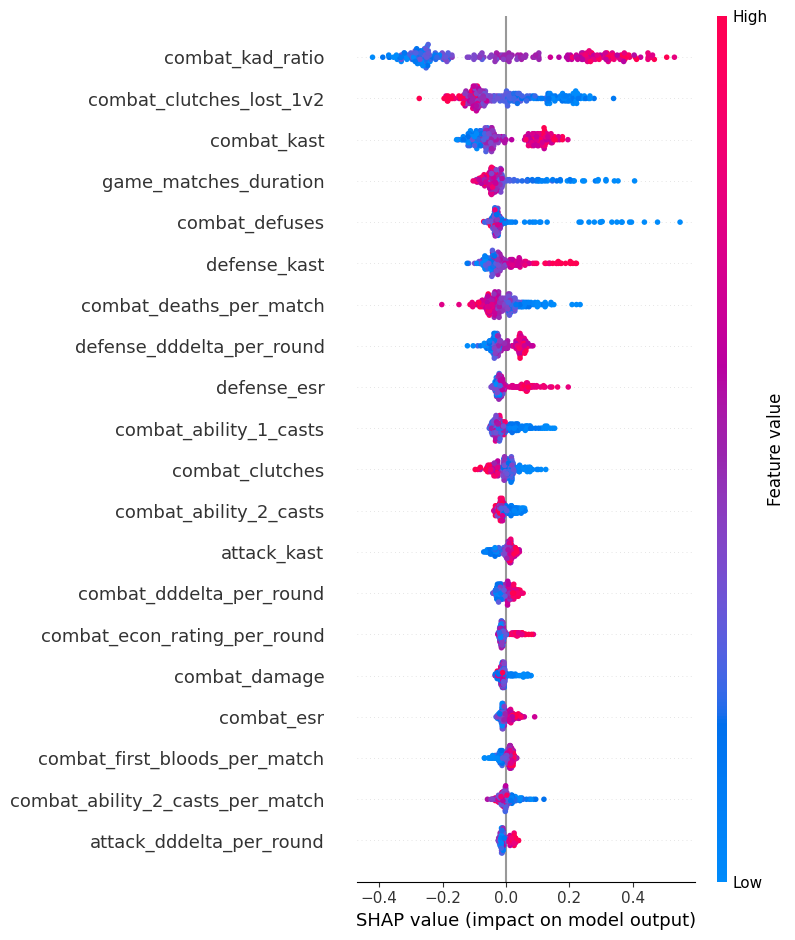

In [145]:
# Random Forest SHAP
rf_explainer = shap.TreeExplainer(best_rf)
rf_shap_values = rf_explainer.shap_values(X_train)

shap.summary_plot(rf_shap_values, X_train, max_display=20, plot_type="bar", show=True)
shap.summary_plot(rf_shap_values, X_train, max_display=20, show=True)

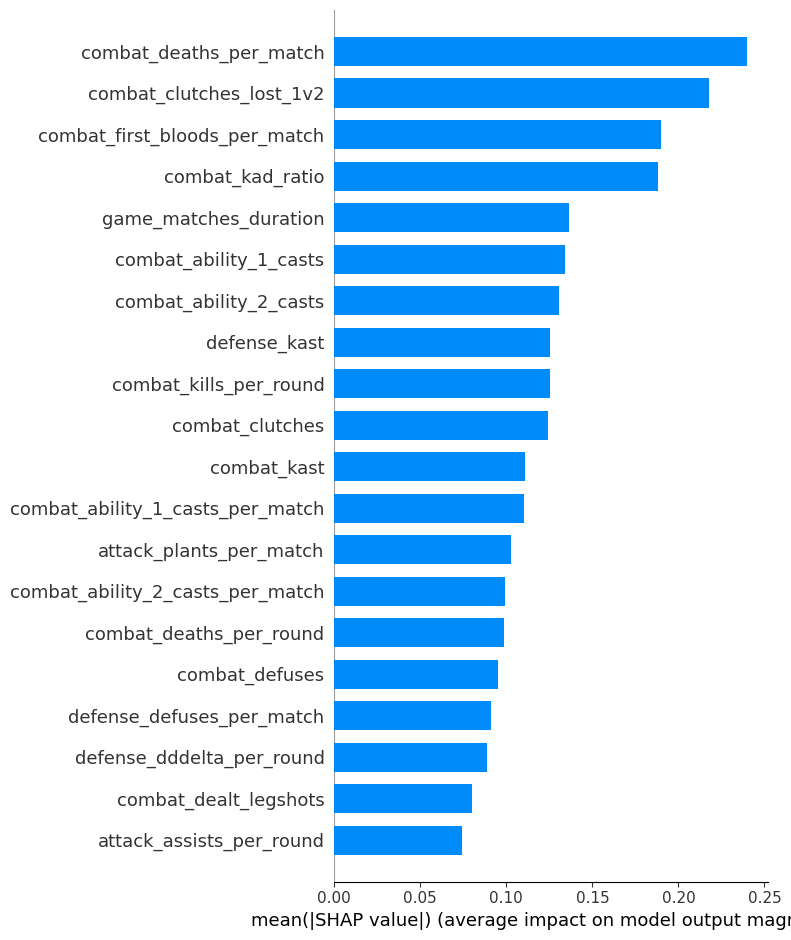

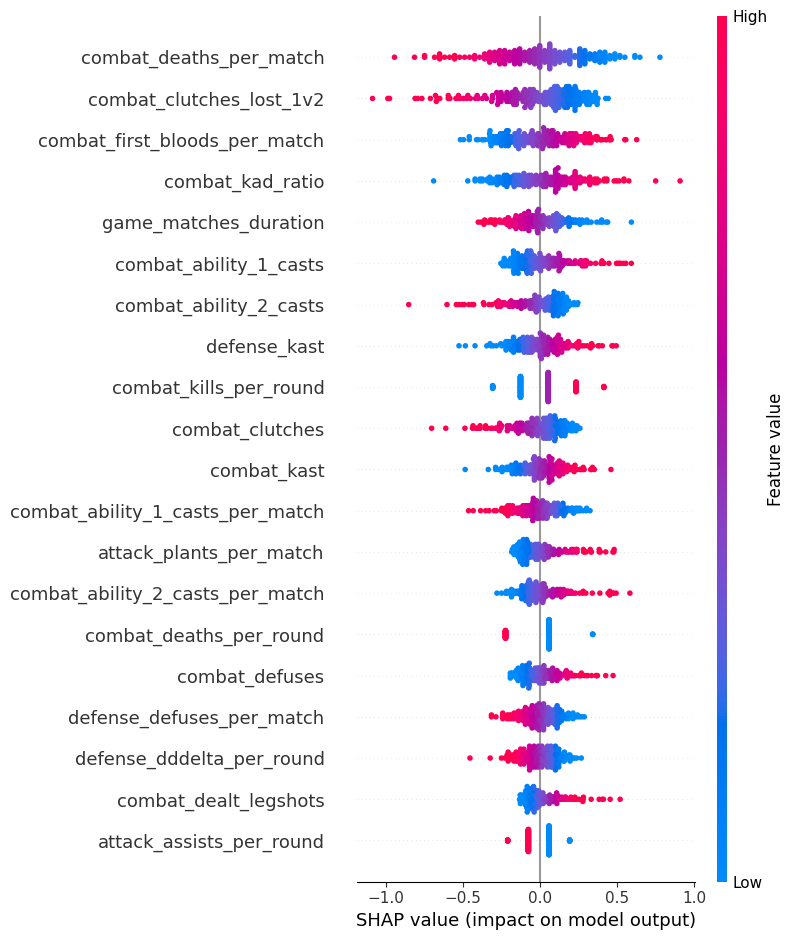

In [146]:
# Ridge
shap_linear = shap.Explainer(ridge, X_train)  
shap_values_linear = shap_linear(X_train)

shap.summary_plot(shap_values_linear, X_train, max_display=20, plot_type="bar", show=True)
shap.summary_plot(shap_values_linear, X_train, max_display=20)

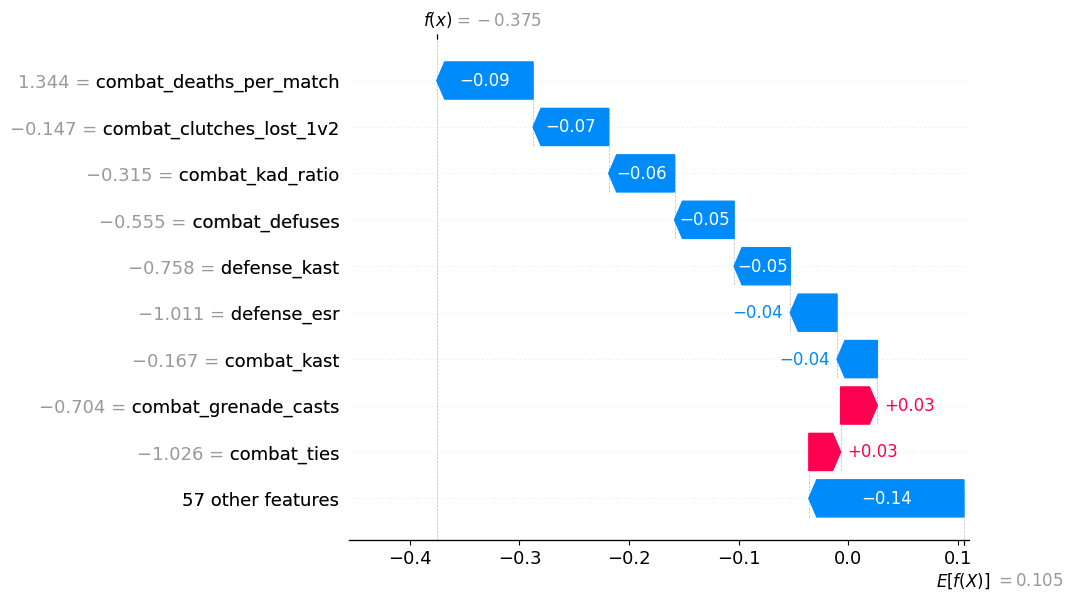

In [149]:
# Waterfall plot to observe a specific player! (play around with later)
rf_explainer = shap.Explainer(best_rf, X_train)  
rf_shap_values = rf_explainer(X_test, check_additivity=False)

shap.plots.waterfall(rf_shap_values[1])

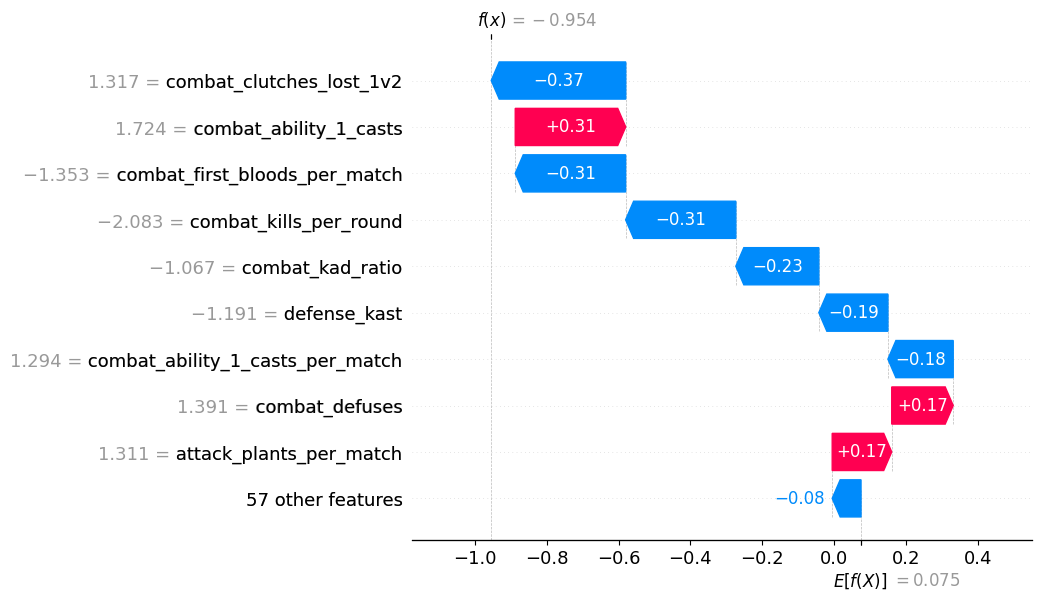

In [152]:
# Waterfall plot to observe a specific player! (play around with later)
ridge_explainer = shap.Explainer(ridge, X_train)  
ridge_shap_values = ridge_explainer(X_test)

shap.plots.waterfall(ridge_shap_values[0])

In [153]:
# 1. Get importances from Ridge and Random Forest
ridge_importance = pd.Series(ridge.coef_, index=X.columns)
rf_importance = pd.Series(best_rf.feature_importances_, index=X.columns)

# 2. Normalize both
ridge_norm = ridge_importance.abs() / ridge_importance.abs().sum()
rf_norm = rf_importance / rf_importance.sum()

# 3. Combine by average
combined_importance = (ridge_norm + rf_norm) / 2

# 4. Sort descending
combined_importance = combined_importance.sort_values(ascending=False)

combined_importance.head(10)

combat_kad_ratio                 0.120480
combat_clutches_lost_1v2         0.067943
combat_kast                      0.048148
combat_deaths_per_match          0.045896
combat_defuses                   0.041195
game_matches_duration            0.040194
defense_kast                     0.035628
combat_ability_1_casts           0.031441
combat_first_bloods_per_match    0.027726
combat_clutches                  0.026978
dtype: float64

In [154]:
combined_importance.head(20)

combat_kad_ratio                    0.120480
combat_clutches_lost_1v2            0.067943
combat_kast                         0.048148
combat_deaths_per_match             0.045896
combat_defuses                      0.041195
game_matches_duration               0.040194
defense_kast                        0.035628
combat_ability_1_casts              0.031441
combat_first_bloods_per_match       0.027726
combat_clutches                     0.026978
combat_ability_2_casts              0.023790
combat_ability_2_casts_per_match    0.023406
defense_dddelta_per_round           0.022781
attack_plants_per_match             0.017998
combat_ability_1_casts_per_match    0.016929
defense_esr                         0.016083
defense_defuses_per_match           0.015955
combat_kills_per_round              0.015203
combat_dealt_legshots               0.014770
combat_first_bloods                 0.012629
dtype: float64

### V. Cluster Analysis

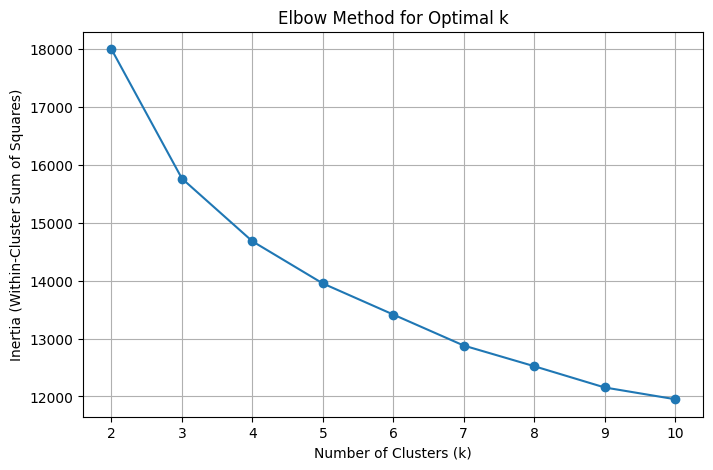

In [155]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(filtered_df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

In [160]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(filtered_df)

# Add cluster labels to your player dataframe
clean_players["cluster"] = cluster_labels

C:\Users\Polar\AppData\Local\Temp\ipykernel_8616\3841930400.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_players["cluster"] = cluster_labels


In [173]:
cluster_summary = clean_players.groupby("cluster").mean(numeric_only=True)


In [174]:
print(clean_players["cluster"].value_counts())

cluster
2    134
1     98
0     60
Name: count, dtype: int64


In [175]:
from scipy.stats import zscore

z_cluster_summary = cluster_summary.apply(zscore)

In [178]:
cluster_0 = z_cluster_summary.loc[0].sort_values(ascending=False)
cluster_1 = z_cluster_summary.loc[1].sort_values(ascending=False)
cluster_2 = z_cluster_summary.loc[2].sort_values(ascending=False)

In [180]:
# Cluster 0 Features
print(cluster_0.head(10))

attack_first_bloods     1.414177
combat_multikills_3k    1.414177
combat_first_bloods     1.413967
defense_first_bloods    1.413629
attack_headshots        1.410406
combat_multikills_4k    1.410403
combat_headshots        1.409696
attack_kills            1.409401
combat_kills            1.409316
defense_kills           1.409233
Name: 0, dtype: float64


In [181]:
# Cluster 1 Features
print(cluster_1.head(10))

combat_ultimate_casts_per_round    1.414214
game_round_win                     1.414154
attack_round_win                   1.413703
defense_round_win                  1.412953
game_win                           1.411939
attack_kast                        1.409325
combat_kad_ratio                   1.403591
combat_kast                        1.397627
attack_dddelta_per_round           1.397484
attack_k_per_d_ratio               1.392271
Name: 1, dtype: float64


In [182]:
# Cluster 2 Features
print(cluster_2.head(10))

defense_assists_per_round           1.414128
combat_ability_1_casts_per_match    1.413568
combat_assists_per_round            1.397102
attack_plants_per_round             1.387394
attack_plants_per_match             1.359425
combat_assists_per_match            1.319376
combat_ability_1_casts_per_round    1.281858
game_matches_duration               1.176461
attack_assists_per_round            1.145888
game_rounds_duration                0.992914
Name: 2, dtype: float64


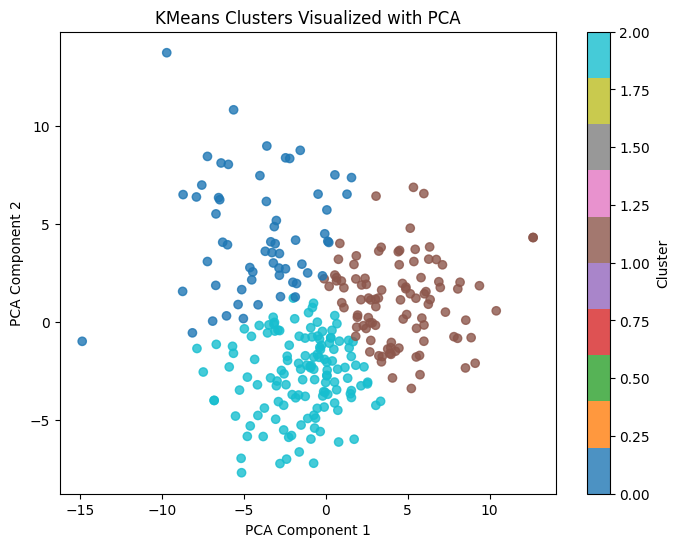

In [163]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(filtered_df)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], c=cluster_labels, cmap="tab10", alpha=0.8)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KMeans Clusters Visualized with PCA")
plt.colorbar(scatter, label="Cluster")
plt.show()


cluster
0    860.100000
1    852.795918
2    771.932836
Name: rank_rating, dtype: float64


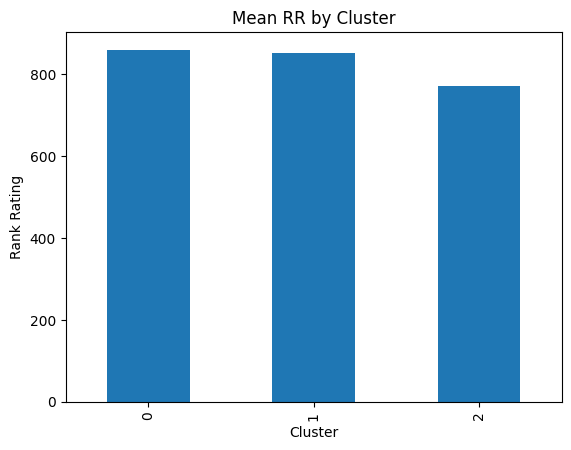

In [184]:
mean_rr_per_cluster = clean_players.groupby("cluster")["rank_rating"].mean().sort_values(ascending=False)
print(mean_rr_per_cluster)

mean_rr_per_cluster.plot(kind="bar", title="Mean RR by Cluster", ylabel="Rank Rating", xlabel="Cluster")
plt.show()

region         ap        br        eu        kr     latam        na
cluster                                                            
0        0.100000  0.250000  0.233333  0.033333  0.183333  0.200000
1        0.183673  0.102041  0.204082  0.183673  0.122449  0.204082
2        0.194030  0.179104  0.111940  0.208955  0.179104  0.126866


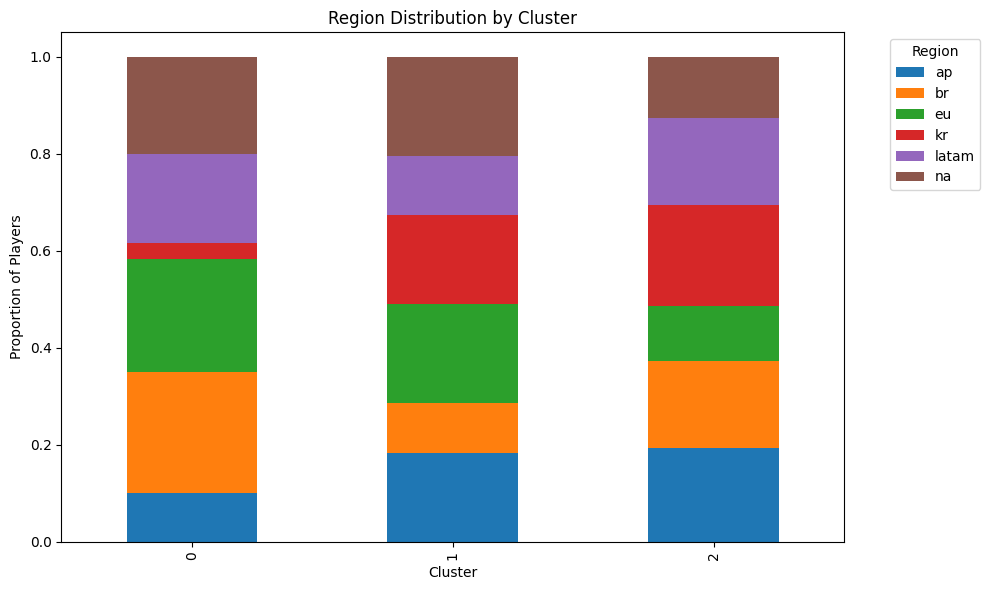

In [185]:
region_dist = clean_players.groupby("cluster")["region"].value_counts(normalize=True).unstack().fillna(0)
print(region_dist)

region_dist.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Region Distribution by Cluster")
plt.ylabel("Proportion of Players")
plt.xlabel("Cluster")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


cluster         0         1         2
region                               
ap       0.120000  0.360000  0.520000
br       0.306122  0.204082  0.489796
eu       0.285714  0.408163  0.306122
kr       0.041667  0.375000  0.583333
latam    0.234043  0.255319  0.510638
na       0.244898  0.408163  0.346939


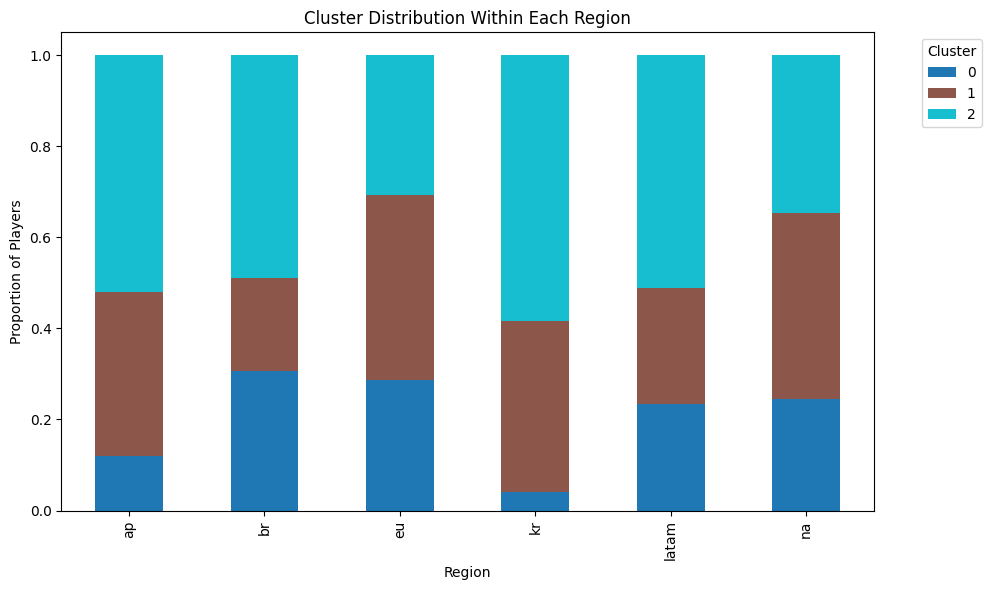

In [186]:
cluster_dist_per_region = (
    clean_players.groupby("region")["cluster"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

print(cluster_dist_per_region)

cluster_dist_per_region.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="tab10")
plt.title("Cluster Distribution Within Each Region")
plt.ylabel("Proportion of Players")
plt.xlabel("Region")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### VI. Misc

In [136]:
# poppinsguide com#BUYYY EP9A3 stats
kills = 3825
deaths = 3362
assists = 1517
kda = 1.36
kad = 1.59

(kills + assists) / deaths # KAD

kills / (deaths + assists) # = 0.78
(kills + deaths) / assists # = 4.74
(deaths + assists) / kills # = 1.28
assists / (kills + deaths) # = 0.21
deaths / (kills + assists) # = 0.63

(kills + 0.5 * assists) / deaths # KDA

1.3633254015466985